## Observations and Insights 

In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
ms_df=pd.merge(mouse_metadata_df,study_results_df, on="Mouse ID")

# Display the data table for preview
ms_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
print("There are",ms_df["Mouse ID"].count(),"mice records in dataset.")
print("There are",ms_df["Mouse ID"].agg(pd.Series.nunique), "unique mice in dataset")

There are 1893 mice records in dataset.
There are 249 unique mice in dataset


In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
dup_ms_df = ms_df[ms_df.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicate Rows based on Mouse ID and Timepoint are:", dup_ms_df, sep='\n')

Duplicate Rows based on Mouse ID and Timepoint are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Drop any duplicate rows
unique_ms_df=ms_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
unique_ms_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Recheck the number of mice
print("There are:",len(unique_ms_df),"records of unique Mouse ID and Timepoint.\n")

There are: 1888 records of unique Mouse ID and Timepoint.



## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
print(unique_ms_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']}))


             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

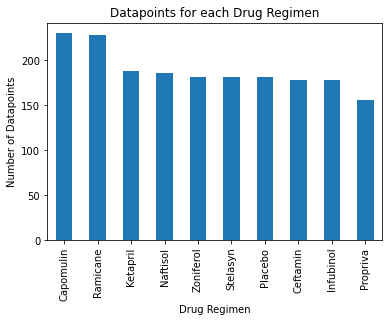

In [7]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
drug_dp_df=unique_ms_df["Drug Regimen"].value_counts()
bar_chart=drug_dp_df.plot(kind='bar')
bar_chart.set_title("Datapoints for each Drug Regimen")
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of Datapoints")
plt.show()

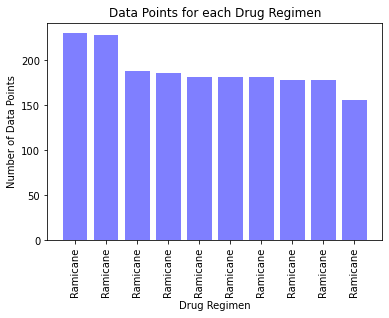

In [8]:
# General identical bar plot using pyplot instead of pandas.
datapoints=drug_dp_df
regimen=np.arange(len(datapoints))
plt.bar(regimen,datapoints,color='blue',alpha=0.5,align='center')
tick_locations=[value for value in regimen]
plt.xticks(tick_locations,unique_ms_df['Drug Regimen'], rotation='vertical')
plt.title("Data Points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

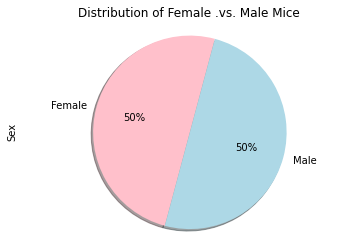

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count=unique_ms_df.groupby(['Sex']).nunique()
gender_count.plot(kind="pie",y='Sex',startangle=75, autopct="%1.0f%%", legend=False, shadow=True,colors=["pink","lightblue"])
plt.title("Distribution of Female .vs. Male Mice")
plt.axis("equal")
plt.show()


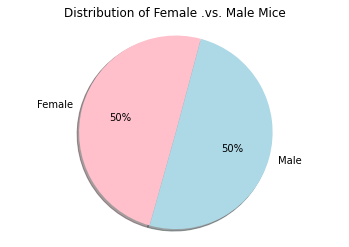

In [10]:
# Generate identical pie plot using pyplot
Sex=["Female","Male"]
Count=gender_count["Mouse ID"]
Colors=["pink","lightblue"]
plt.pie(Count,labels=Sex,colors=Colors,autopct="%1.0f%%",shadow=True,startangle=75)
plt.title("Distribution of Female .vs. Male Mice")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Create clean dataset which contains 3 columns Mouse ID, Drug Regiment, and Timepoint.
max_tp_df=unique_ms_df[["Mouse ID","Drug Regimen","Timepoint"]]

#Create reg_df based on only the mice which were on the 4 Drugs below.
regimen=['Capomulin','Ceftamin','Infubinol','Ramicane']
reg_df=max_tp_df.loc[
        (max_tp_df["Drug Regimen"]==regimen[0]) |
        (max_tp_df["Drug Regimen"]==regimen[1]) |
        (max_tp_df["Drug Regimen"]==regimen[2]) |
        (max_tp_df["Drug Regimen"]==regimen[3])
    ,:]

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
# Create a groupby DataFrame based on Mouse ID and Drug Regimen pulling out the max value of timepoint for each mouse.
final_df=reg_df.groupby(["Mouse ID","Drug Regimen"]).max()
pd.set_option('display.max_rows',200)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#Create merge_df which will contain all of the mice with only the last greatest timepoint with the rest of the data for that mouse.
final_mousetvol_df=pd.merge(unique_ms_df,final_df,on=["Mouse ID","Timepoint"])
final_mousetvol_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
5,s508,Ramicane,Male,1,17,45,30.276232,0
6,f966,Capomulin,Male,16,17,20,30.485985,0
7,m546,Ramicane,Male,18,16,45,30.564625,1
8,z578,Ramicane,Male,11,16,45,30.638696,0
9,j913,Ramicane,Female,4,17,45,31.560470,1


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [37]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)
regimens_df=unique_ms_df["Drug Regimen"]
regimens_df=regimens_df.drop_duplicates()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_df=final_mousetvol_df["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=final_mousetvol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
irq=upperq-lowerq
print(f"The lower quartile of Final Tumor Volume is: {lowerq}")
print(f"The upper quartile of Final Tumor Volume is: {upperq}")
print(f"The interquartile of Final Tumor Volume is: {irq}")
print(f"The median quartile of Final Tumor Volume is: {quartiles[0.5]}")

    # Locate the rows which contain mice on each drug and get the tumor volumes
Capomulin=final_mousetvol_df.loc[final_mousetvol_df["Drug Regimen"]=="Capomulin",:]
Ceftamin=final_mousetvol_df.loc[final_mousetvol_df["Drug Regimen"]=="Ceftamin",:]
Infubinol=final_mousetvol_df.loc[final_mousetvol_df["Drug Regimen"]=="Infubinol",:]
Ramicane=final_mousetvol_df.loc[final_mousetvol_df["Drug Regimen"]=="Ramicane",:]    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound=lowerq-(1.5*irq)
upper_bound=upperq+(1.5*irq)
   

The lower quartile of Final Tumor Volume is: 37.187743802499995
The upper quartile of Final Tumor Volume is: 59.930261755000004
The interquartile of Final Tumor Volume is: 22.74251795250001
The median quartile of Final Tumor Volume is: 45.0


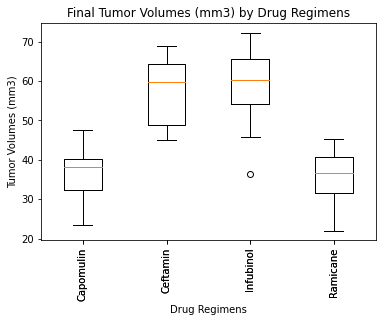

In [232]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
regimen=('Capomulin','Ceftamin','Infubinol','Ramicane')
x=[1,2,3,4]
drugs=[Capomulin["Tumor Volume (mm3)"],Ceftamin["Tumor Volume (mm3)"],Infubinol["Tumor Volume (mm3)"],Ramicane["Tumor Volume (mm3)"]]
fig1, ax = plt.subplots()
ax.set_title('Final Tumor Volumes (mm3) by Drug Regimens')
ax.set_xlabel('Drug Regimens')
ax.set_ylabel('Tumor Volumes (mm3)')
plt.xticks(x,regimen,rotation='vertical')
ax.boxplot(drugs,labels=regimen)
plt.show()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights